# Suicide Rates Around the World

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/user/course401/data-visulization/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read the suicides rate statistics using pandas

In [3]:
df = pd.read_csv('./master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## A brief description of the data above

In [29]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Now we are going to look at the suicidal rates regarding to the generation and see which generation has a higher rates 

<AxesSubplot:xlabel='generation', ylabel='count'>

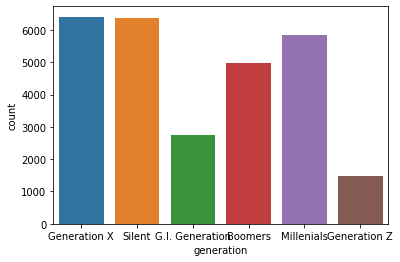

In [11]:
sns.countplot(x="generation", data=df)

### So it seems from the graph above that generation x and silent G.I. have almost the same rates, but the generation x' rates are slightly higher than the silent G.I., Maybe because of the circumstances that they have to go through

### Now let's see the suicides number of each gender and what's higher:

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

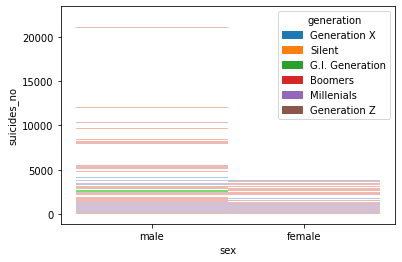

In [66]:
gender_suicides= sns.histplot(x="sex", y ="suicides_no", data = df, hue ="generation") 
gender_suicides


### it seems from the histogram above that males has much larger number of suicides than the females .
### After that, we are going to look at the years stats vs the suicides numbers and see where is the peek 

In [20]:
year_stats=df[['year','suicides_no']]
year_stats

,year,suicides_no
0,1987,21
1,1987,16
2,1987,14
3,1987,1
4,1987,9
...,...,...
27815,2014,107
27816,2014,9
27817,2014,60
27818,2014,44


/home/user/course401/data-visulization/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='suicides_no'>

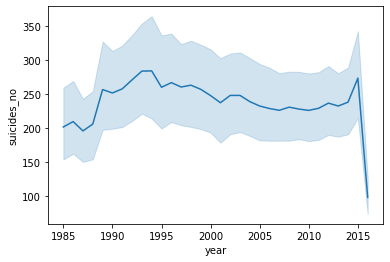

In [28]:
y = year_stats["suicides_no"]
x=year_stats["year"]

year_vs_suicides=sns.lineplot(x,y)
year_vs_suicides

### It seems that the highest suicide rate was in 2014 and 1994 
### Now wee are going to look at suicides number/100k of population in four country, and see what country has the highest rate

/home/user/course401/data-visulization/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='suicides/100k pop'>

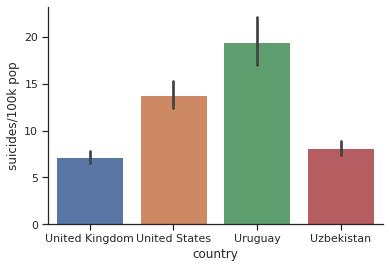

In [101]:
x = df['country'].tail(1300)
y = df['suicides/100k pop'].tail(1300)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style="ticks", rc=custom_params)

sns.barplot(x,y)


### it seems from the graph that Uruguay has the highest suicide ratio and United Kingdom has the lowest ratio between the four countries .

### Next, we are going to look the suicide numbers vs the age of the people who committed it .

/home/user/course401/data-visulization/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='suicides_no'>

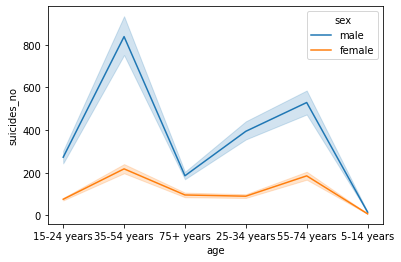

In [81]:
x = df['age']
y=df['suicides_no']

sns.lineplot(x,y, hue=df['sex'])

### so it seems that the people between 35-54 years have the most suicidal rates for both males and females, and kids between 5-14 years have obviously the lowest rates, like of course children will have the lowest suicide numbers !!
###  after that we will look at the national economy for some countries and its relation with suicide rates

In [108]:
gdp_plot = df[['country','suicides/100k pop','gdp_per_capita ($)']].tail(1500)
gdp_plot

,country,suicides/100k pop,gdp_per_capita ($)
26320,Ukraine,67.72,4104
26321,Ukraine,48.66,4104
26322,Ukraine,48.40,4104
26323,Ukraine,41.88,4104
26324,Ukraine,24.04,4104
...,...,...,...
27815,Uzbekistan,2.96,2309
27816,Uzbekistan,2.58,2309
27817,Uzbekistan,2.17,2309
27818,Uzbekistan,1.67,2309


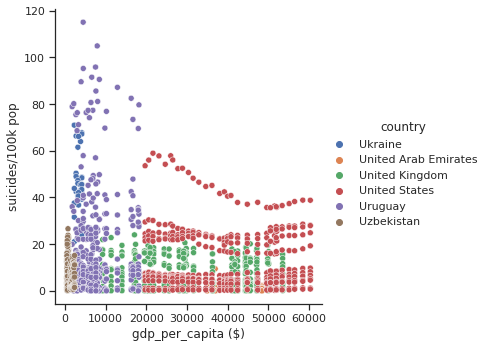

In [109]:


sns.relplot(x=gdp_plot['gdp_per_capita ($)'],y=gdp_plot['suicides/100k pop'], hue =gdp_plot['country'])

### so it seems that the poorer the country is or the worse its economy, the higher the suicidal rate for it, and that explains why Uruguay and Ukraine have high suicide number 

## Conclusion:
- Generation x has the highest number of suicides and the young generations have low suicidal rates
- males commit suicides way more than females
- the years seem from 1994 to 2014 have a close suicidal number, but the highest numbers happened in 1994 and 2014
- the people between 34-54 years seem to have the most suicidal rate
- the countries with bad economy, have higher suicidal rates  